# Credentials

<b> Name: Sujan Neupane <br>
<b> Uni ID: 2058939 <br>
<b> Herald ID: np03cs4s210019

## Importing dependencies

In [1]:
# NumPy lubrary wil be used to perform array manipulations
import numpy as np 

# Matplotlib library will be used to plot the image
import matplotlib.pyplot as plt

# Pillow will be used to load the image and convert it into grayscale version
from PIL import Image

# 1. Load and Prepare the Data

<b> Using Pillow.Image.Open method to open the image named `Sujan.jpg`

In [46]:
img = Image.open(r'Sujan.jpg')

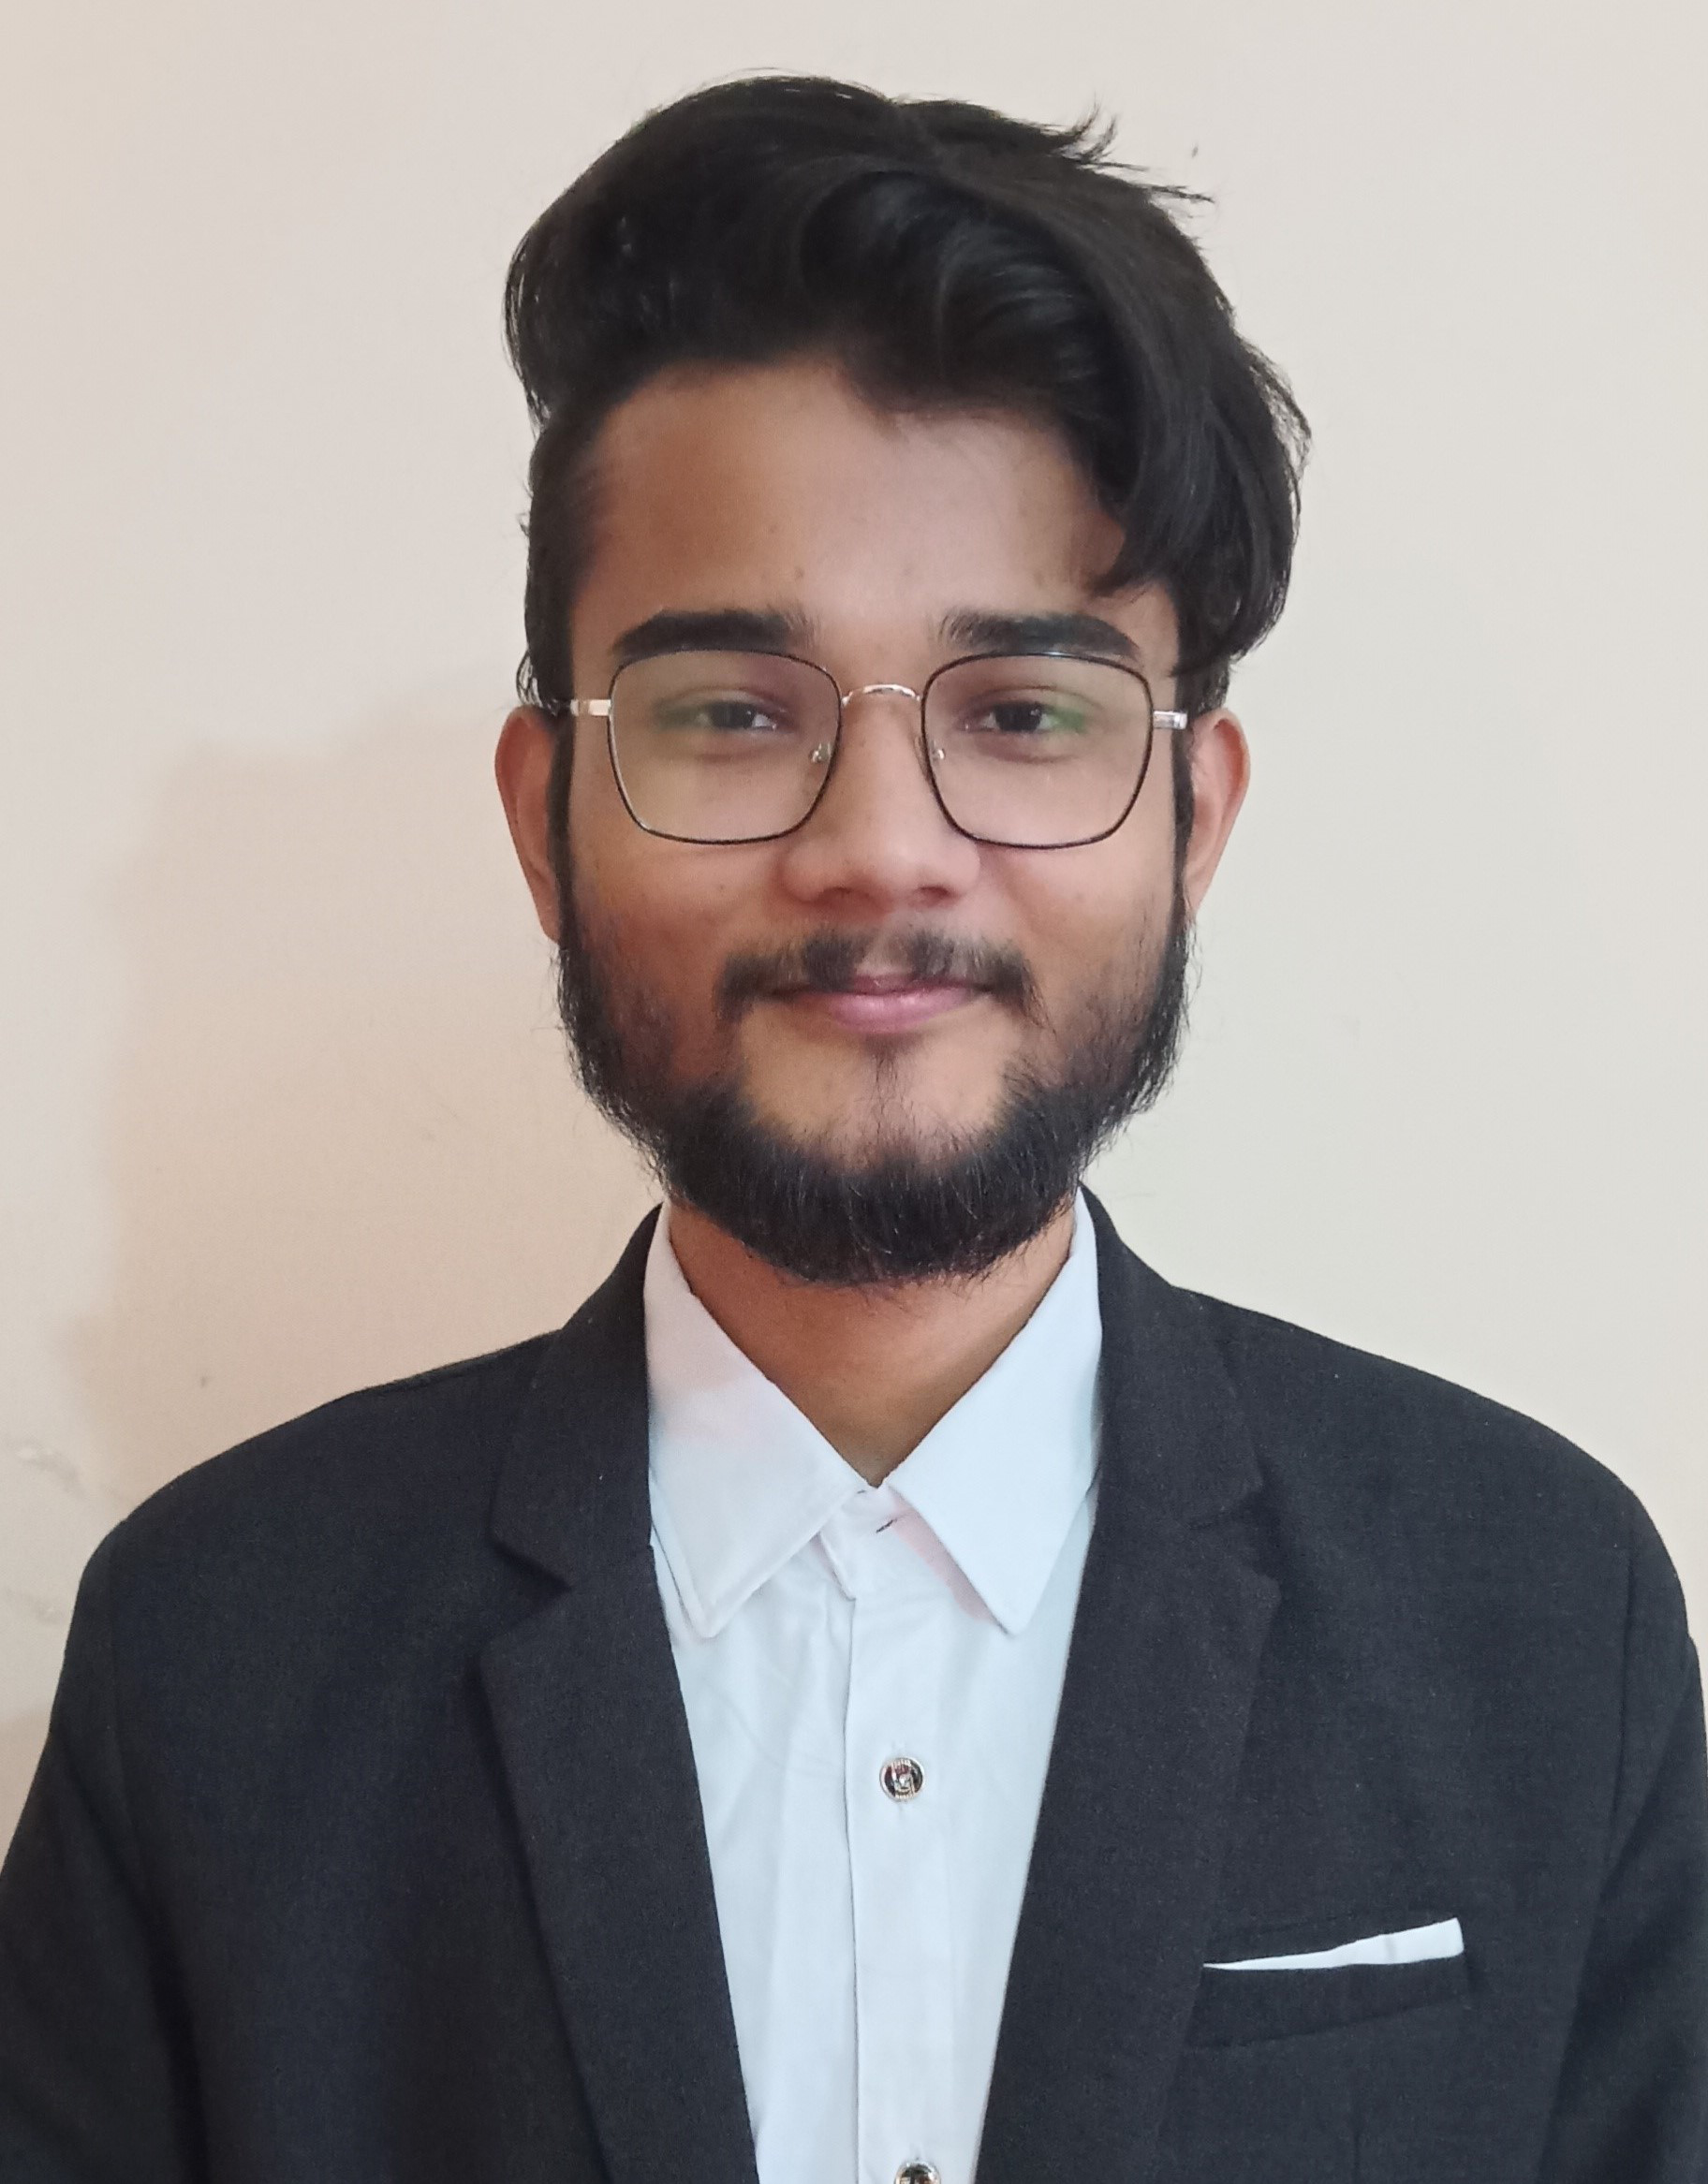

In [47]:
img

Since the image is a `RGB` image, I will proceed to convert it into a grayscale version using the convert method of the pillo image object

In [48]:
img = img.convert('L') # converting to grayscale

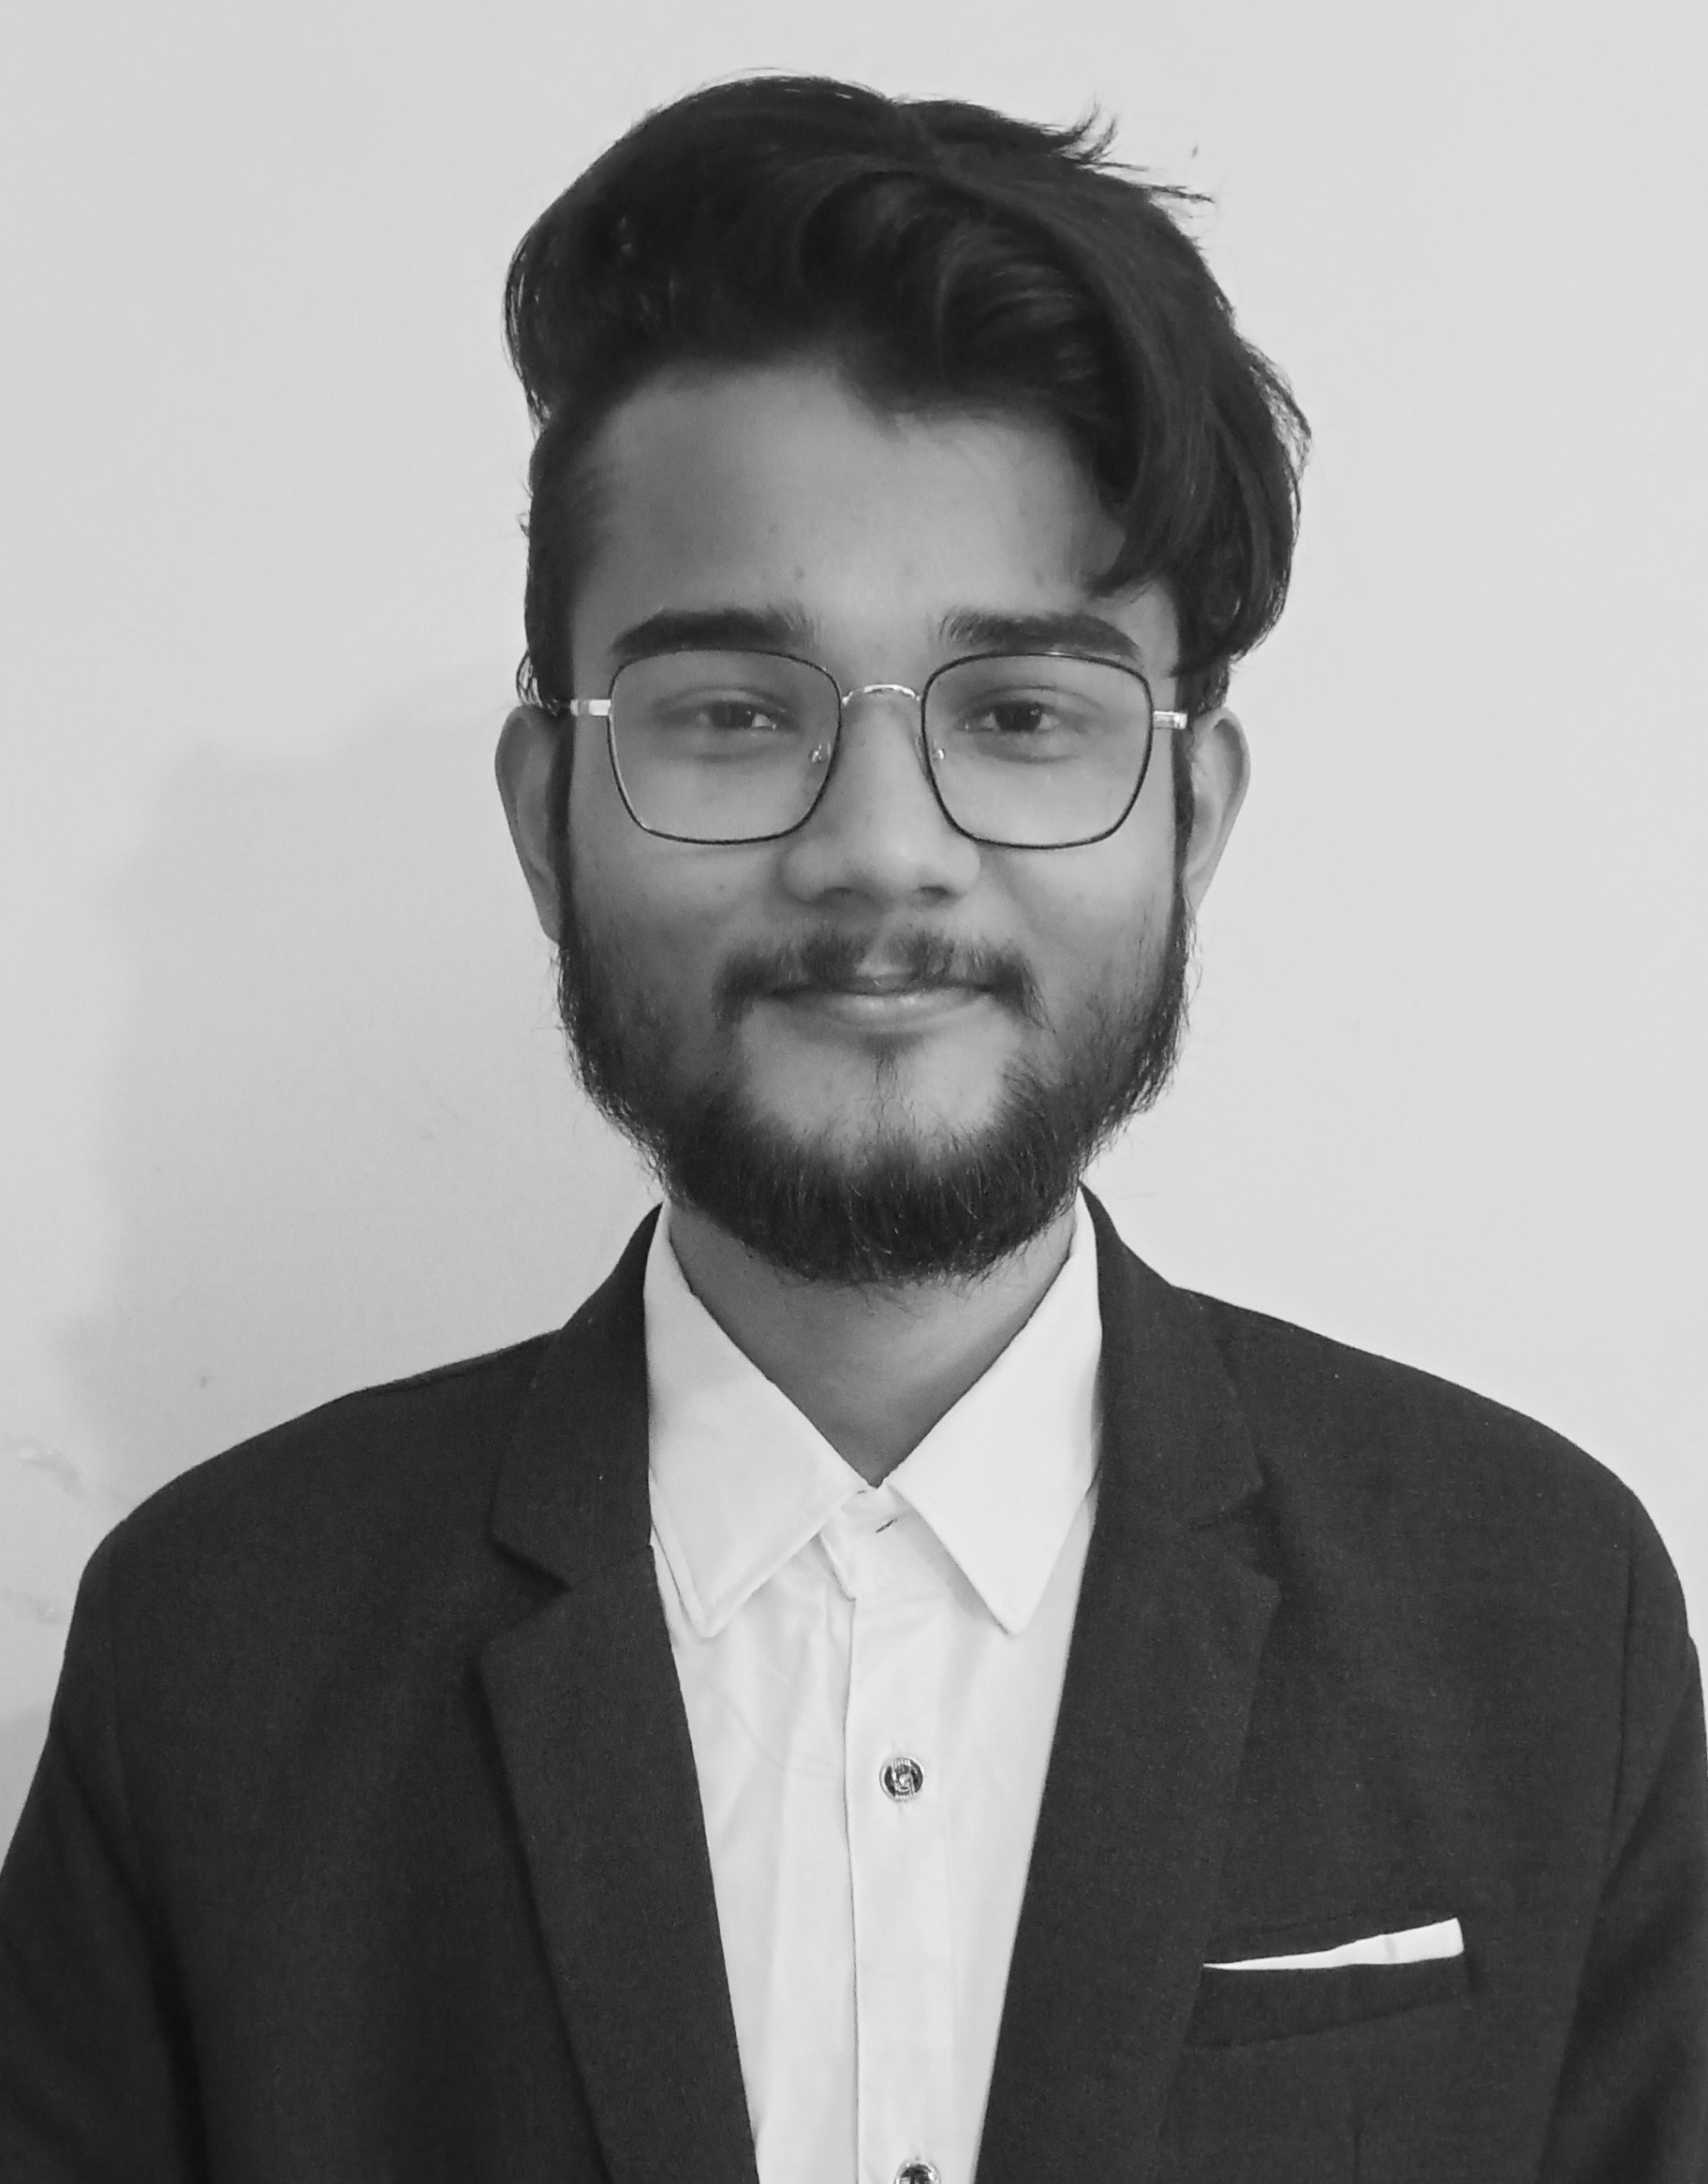

In [49]:
img

In [50]:
img.save('grayscale_sujan.jpg')

I will proceed to convert the image to NumPy array to perform array operations for the upcoming steps

In [51]:
img = np.array(img)

In [52]:
img

array([[213, 213, 213, ..., 220, 220, 220],
       [213, 213, 213, ..., 220, 220, 220],
       [213, 213, 213, ..., 220, 220, 220],
       ...,
       [ 37,  39,  35, ...,  60,  62,  61],
       [ 37,  39,  36, ...,  61,  63,  60],
       [ 38,  39,  36, ...,  61,  62,  59]], dtype=uint8)

In [53]:
img.shape

(2333, 1824)

This image, after being converted to grayscale version, has 2333 rows and 1824 columns respectively. I will proceed to standarize the pixels in the next step.

# 2. Standardize/Scale the data

In `Standard Scaling` , we subtract the pixels with mean and subtract by the standard deviation.
This will center the data around zero with a unit standard deviation.

In [54]:
# calculatig mean of the 2-d image array with axis=0, meaninig for columns or vertical axis
mean = np.mean(img, axis = 0)

In [55]:
# calculatig standard deviation of the 2-d image array with axis=0, meaninig for columns or vertical axis
standard_deviation = np.std(img, axis = 0)

In [56]:
mean, mean.shape

(array([182.22331762, 181.92627518, 181.69009859, ..., 187.94299186,
        188.86155165, 189.96013716]),
 (1824,))

In [57]:
standard_deviation, standard_deviation.shape

(array([60.48114928, 60.63802547, 60.81264554, ..., 62.30597803,
        61.42999557, 60.16890532]),
 (1824,))

In [58]:
# performing standard scaling
scaled_img = ((img - mean) / standard_deviation)

In [59]:
scaled_img ,scaled_img.shape

(array([[ 0.50886405,  0.51244619,  0.5148584 , ...,  0.51450935,
          0.50689322,  0.49925892],
        [ 0.50886405,  0.51244619,  0.5148584 , ...,  0.51450935,
          0.50689322,  0.49925892],
        [ 0.50886405,  0.51244619,  0.5148584 , ...,  0.51450935,
          0.50689322,  0.49925892],
        ...,
        [-2.40113357, -2.35704039, -2.4121644 , ..., -2.05346254,
         -2.06514017, -2.14330203],
        [-2.40113357, -2.35704039, -2.39572045, ..., -2.03741271,
         -2.04886148, -2.15992191],
        [-2.38459949, -2.35704039, -2.39572045, ..., -2.03741271,
         -2.06514017, -2.17654179]]),
 (2333, 1824))

# 3. Calculate Covariance Matrix 

Let us consider two random variables `X` and `Y`. <br>

The covariance matrix between the 2 random variables `X` and `Y` is square matrix of dimensions 2 * 2 that summarizes how these two variables vary together.

The covariance matrix contains the covariances of following ordered pairs: <br>
    
    1. Cov(X, X)
    2. Cov(X, Y)
    3. Cov(Y, X)
    4. Cov(Y, Y)
    
Finally, after the covariances of the above ordered pairs, we create a covariance matrix as follows: <br>

\begin{matrix}
    [[Cov(X, X) & Cov(X, Y)]\\
    [[Cov(Y, X) & Cov(Y, Y)]]
\end{matrix}

The diagonal elements contain the covariance of same elements that are simply variances of corresponing elements. <br><br>
Additionally, the Covariance Matrix is a symmetric, and the upper and lower triangular proportions are equal respectively.

<b> I will use cov method from NumPy library to calculate a covariance matrix

In [60]:
# Calculating the covariance matrix of the scaled data respectively

cov = np.cov(scaled_img, rowvar=False)

In [61]:
cov

array([[1.00042882, 0.99949542, 0.99784204, ..., 0.88760864, 0.89489837,
        0.90868196],
       [0.99949542, 1.00042882, 0.99954307, ..., 0.89011604, 0.8975333 ,
        0.91130051],
       [0.99784204, 0.99954307, 1.00042882, ..., 0.89284475, 0.90040998,
        0.91415673],
       ...,
       [0.88760864, 0.89011604, 0.89284475, ..., 1.00042882, 0.99306652,
        0.97619367],
       [0.89489837, 0.8975333 , 0.90040998, ..., 0.99306652, 1.00042882,
        0.99157788],
       [0.90868196, 0.91130051, 0.91415673, ..., 0.97619367, 0.99157788,
        1.00042882]])

In [62]:
cov.shape

(1824, 1824)

# 4. Eigen Decomposition

`Eigen Decomposition` is the process that decomposes a `Covariance Matrix` into `Eigen Values` and `Eigen Vectors`.<br>

Let us consider a Covariance Matrix `A` and an Identity Matrix `I`. <br>
Here, decomposing a Covariance Matris into eigen values can be given by following equation: <br>

    det(A - λI) = 0 ------------- equation (1)
    
    where, det = Determinant of the matrix
           A = covariance matrix
           I = Identity matrix

Let us suppose that out covariance matrix is given as:
\begin{matrix}
[[A & B]\\
[[C & D]]
\end{matrix}

where A, B, C and D are corresponding covariances

Following the equation 1, we get:

    det(A - λI) = 0
    
Computing this equation will result in a 2 degree polynomial equation, or also known as a quardatic equation.  <br>

$$ ax^2 + bx + c = 0 $$

Finally, we get

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

We get two values after computing the above equation that gives us `2 Eigen Values`.<br>

Now, for each `Eigen Value`, we compute the corresponding `Eigen Vector` using following formula:

<b>(S - λI) * U = 0</b>

Where,<br> 
       S = the covariance matrix<br>
       λ = the corresponding Eigen Value<br>
       I = Identity Matrix<br>
       U = the Eigen Vector corresponding the Eigen Value λ<br>

Eigenvalues measure the `Shrinking` or `Stretching` of a matrix in various directions. If a specific eigen value of a eigen vector is very large, the matrix stretches the most along that direction. However, if the eigen value corresponding to a eigenvector is very small, the matrix shrinks in that direction.


Therfore, it can be concluded that a larger eigenvalue corresponding to a eigenvector will contain more information about the data. It is because the eigenvalue and eigenvector pair represent the direction in which the data varies the most, which can help us to capture more and important patterns in the ogigina ldata.

 <b><i>I will make use of np.linalg.eigh method to peform Eigen Decomposition of a Covariance Matrix 

In [63]:
# calculating eigen values and eigen vectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov)

In [64]:
eigenvalues.shape, eigenvectors.shape

((1824,), (1824, 1824))

# 5.  Identify Principal Components

Now that we have the Eigen value and Eigen vectors, we will create the Eigen Vector+Value pair, and sort the pair in descending order with respect to eigen values.

It is done because the largest Eigen values and their corresponding vectors can be used to compress the image by recovering maximum information.

In [65]:
eigen_vectorValuePairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

In [66]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_vectorValuePairs.sort(key=lambda x: x[0], reverse=True)

In [67]:
len(eigen_vectorValuePairs)

1824

In [68]:
eigen_vectorValuePairs[:3]

[(1187.5976994260652,
  array([0.02011706, 0.02018748, 0.02025422, ..., 0.02154214, 0.02114657,
         0.02075077])),
 (216.45087375465957,
  array([-0.02649578, -0.02646755, -0.02645384, ..., -0.02570477,
         -0.026207  , -0.02676659])),
 (134.01522677863875,
  array([-0.02600096, -0.0260522 , -0.02612901, ..., -0.02744811,
         -0.02754237, -0.02773496]))]

Now that we have sorted the eigenpairs, In order to calculate the number principal components are we going to use,  we can use following method:

$\color{Red}{"explained-variance"}$ 

We can calculate difference of eigen value - total variance, which gives us the variance expained by each individual eigen pairs.

In [69]:
# computing total variance using all eigen values, which must be equal to 1

total = sum([(i[0] / sum(eigenvalues)) for i in eigen_vectorValuePairs]);total

1.0000000000000009

This code calculates the total proportion of variance in the data that is explained by the principal components or each eigen pairs.


First, it loops over each eigenvalue and its corresponding eigenvector in the list of (eigenvalues, eigenvectors) pairs, and for each eigenvalue, it divides the value by the sum of all the eigenvalues to obtain the proportion of total variance explained by that principal component.

Then, it sums up all of these proportions to obtain the total proportion of variance explained by all of the principal components together. This total proportion of variance explained is returned as the output of the code.

In [70]:
total = np.sum(eigenvalues) 
exp_var = [(i/total)*100 for i in sorted(eigenvalues, reverse=True)]
cum_exp_var = np.cumsum(exp_var)

In [71]:
len(exp_var)

1824

In [72]:
exp_var[:3]

[65.08161492669974, 11.861737710553259, 7.344176725617424]

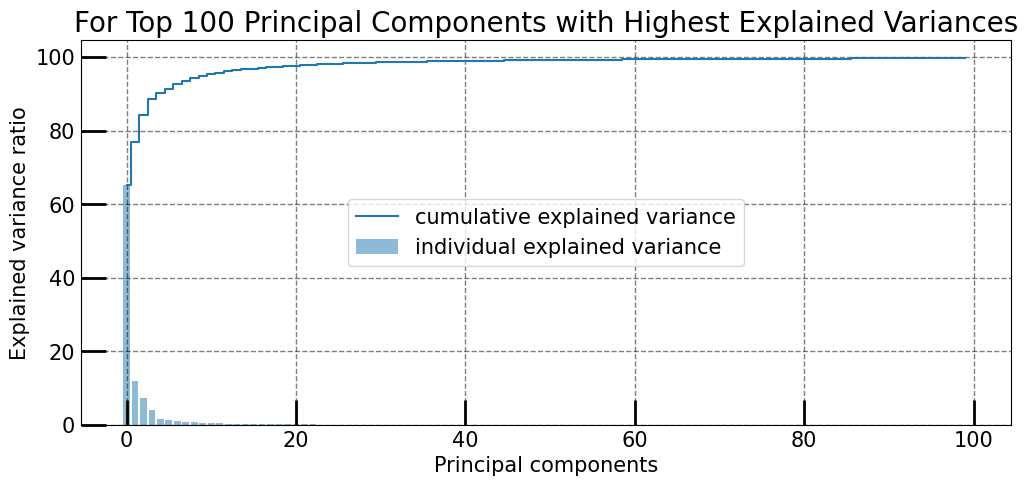

In [73]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
ax1 = plt.subplot(1, 1, 1)

ax1.bar(range(100), exp_var[:100], alpha=0.5, align='center',
        label='individual explained variance')
ax1.step(range(100), cum_exp_var[:100], where='mid',
         label='cumulative explained variance')
ax1.set_ylabel('Explained variance ratio', fontsize = 15)
ax1.set_xlabel('Principal components', fontsize = 15)
ax1.legend(loc='center', fontsize = 15)

ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=18)
ax1.tick_params(which='minor', length=10)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
ax1.set_title("For Top 100 Principal Components with Highest Explained Variances", fontsize = 20)
ax1.tick_params(axis ='both', labelbottom=True, labelsize = 15, pad = 4) 
plt.show()

<b>
We can clearly see that the first principal components explains almost 65 % of the variance alone. Similarly. the next 5 principal components combined with the first principal components expain majority of the variance. Therefore, it can be concluded from the above plot that we can use a fraction of all of `1824` principal components and retain almost 99 % of the original information with fraction of the principal components.

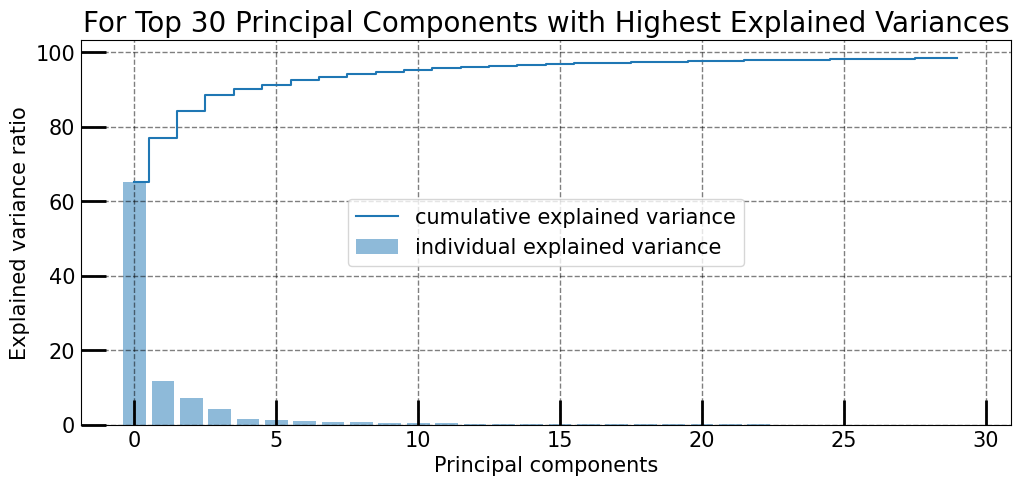

In [74]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
ax1 = plt.subplot(1, 1, 1)

ax1.bar(range(30), exp_var[:30], alpha=0.5, align='center',
        label='individual explained variance')
ax1.step(range(30), cum_exp_var[:30], where='mid',
         label='cumulative explained variance')
ax1.set_ylabel('Explained variance ratio', fontsize = 15)
ax1.set_xlabel('Principal components', fontsize = 15)
ax1.legend(loc='center', fontsize = 15)

ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=18)
ax1.tick_params(which='minor', length=10)
ax1.tick_params(which = 'both', direction = 'in')
ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
ax1.set_title("For Top 30 Principal Components with Highest Explained Variances", fontsize = 20)
ax1.tick_params(axis ='both', labelbottom=True, labelsize = 15, pad = 4) 
plt.show()

The above plot simply shows the variances for top 30 principal components

## Lets see the explained variance for the top 5 principal Components

In [75]:
print("THE FIRST 5 Principal Components have following variances: \n", exp_var[:5])

THE FIRST 5 Principal Components have following variances: 
 [65.08161492669974, 11.861737710553259, 7.344176725617424, 4.160875248109656, 1.6712425337797023]


In [76]:
sum(exp_var[:5])

90.1196471447598

We can clearly see that the first component has almost <b> 65 %</b> variance. <br>
Similarly, the second and third components have <b> 11.86 % and 7.34 % </b> variance. <br>

The top 5 principal components have a total of <b>90.1 %  </b>explained variance. 

## Lets see the explained variance for the top 50 principal Components

In [77]:
print("THE TOP 50 Principal Components have following variances: \n", sum(exp_var[:50]))

THE TOP 50 Principal Components have following variances: 
 99.13832627477287


<b> Amost 99.15 % of the information can be explained by the top 50 principal components among the 1824 components. 

## Lets see the explained variance for the last 1774 components

Since we checked the explained variances of top 50 principal components, lets check for all other compoents other than top 50, meaning that the last 1774 components will be used next.

In [78]:
1824 - 50

1774

In [79]:
print("THE Last 1774 Principal Components have following variances: \n", sum(exp_var[50:]))

THE Last 1774 Principal Components have following variances: 
 0.8616737252270904


Only <b>0.86%</b> of the original information can be retained by last <b> 1774</b> among the <b> 1824</b> components.

<b> Thus, we can use the top 50 components and retain almost 99.15 % of the original information in our image.
Lets proceed to reconstruct our image using the top 50 components </b>

In [80]:
n_principal_components = 50

# 5. Reconstruction of the image:

In [81]:
eigen_vectorValuePairs[:3]

[(1187.5976994260652,
  array([0.02011706, 0.02018748, 0.02025422, ..., 0.02154214, 0.02114657,
         0.02075077])),
 (216.45087375465957,
  array([-0.02649578, -0.02646755, -0.02645384, ..., -0.02570477,
         -0.026207  , -0.02676659])),
 (134.01522677863875,
  array([-0.02600096, -0.0260522 , -0.02612901, ..., -0.02744811,
         -0.02754237, -0.02773496]))]

In [82]:
img_columns = img.shape[1];img_columns

1824

## Image reconstruction using top 5 principal components

Previously, we found out that the top 5 principal components could explain 90.1 % of the total variance. Now, we will proceed to use the corresponding eigen vectors of top 5 eigen values and stack them horizontally using np.hstack method

In [83]:
n_principal_components = 5

matrix_w = np.hstack([(eigen_vectorValuePairs[i][1]).reshape(img_columns ,1) for i in range(n_principal_components)])

In [84]:
eigen_vectorValuePairs[0][1].shape

(1824,)

In [85]:
matrix_w.shape

(1824, 5)

In [86]:
matrix_w

array([[ 0.02011706, -0.02649578, -0.02600096,  0.02307112, -0.02387672],
       [ 0.02018748, -0.02646755, -0.0260522 ,  0.02316357, -0.02354293],
       [ 0.02025422, -0.02645384, -0.02612901,  0.02320956, -0.0232992 ],
       ...,
       [ 0.02154214, -0.02570477, -0.02744811,  0.02491414, -0.01005222],
       [ 0.02114657, -0.026207  , -0.02754237,  0.02519424, -0.0119817 ],
       [ 0.02075077, -0.02676659, -0.02773496,  0.02569626, -0.01455097]])

Next, we will perform matrix multiplication of the image array and the stacked eigen vectors to recast the data into new found feature subspace. <br>

After selecting the top k eigenvectors, we concat those vectors using np.hstack and multiply with the image array to create the projection matrix. 

This new matrix will have a reduced number of dimensions equal to the number of eigenvectors used.

In [87]:
projected_with_k_components = np.dot(scaled_img, matrix_w);projected_with_k_components.shape

(2333, 5)

We can clealry see that the projected matrix has 5 columns or dimensions. It is due to the fact that the new resultant matrix will have reduced number of dimensions equal to the number of eigenvectors used. In this case, we used 5 corresponding eigen vectors of top 5 eigen values.

<b> Finally, now that we have the projection matrix, we will reconstruct the original image by performing the matrix multiplication of the projected data and the transposed of selected eigenvectos stacked horizontally, or columnwise. It will result in an approximation of the original image, but this time, it wil have less/reduced number of dimensions.

In [88]:
reconstructed_from_projected_data = np.dot(projected_with_k_components, matrix_w.T)

In [89]:
reconstructed_from_projected_data.shape

(2333, 1824)

We can clearly see that we have reconstructed the original image. However, this matrix is in it's standard scaled form. Meaning, we need to multiply standard deviation and add the calculated mean, which we used to perform standard scaling in the original image array.

In [90]:
mean

array([182.22331762, 181.92627518, 181.69009859, ..., 187.94299186,
       188.86155165, 189.96013716])

In [91]:
standard_deviation

array([60.48114928, 60.63802547, 60.81264554, ..., 62.30597803,
       61.42999557, 60.16890532])

In [92]:
reconstructed_from_projected_data = (reconstructed_from_projected_data * standard_deviation) + mean

In [93]:
reconstructed_from_projected_data.shape

(2333, 1824)

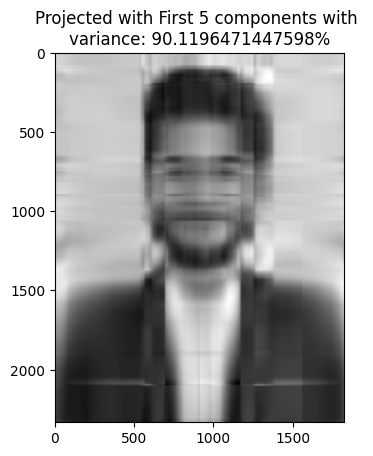

In [94]:
ax = plt.subplot()
ax.imshow(reconstructed_from_projected_data, cmap = 'gray')
ax.set_title("Projected with First {} components with \nvariance: {}%".format(n_principal_components,\
                                                                           sum(exp_var[:n_principal_components])))
plt.show()

### Creating a custom function for image reconstruction

In [95]:
def reconstruct_image(n_components, case):
    
    print("Performing PCA with ", case, " ", str(n_components), " Principal Components.")
    if case == 'First':
        
        # Stacking select number of eigen vectors using np.hstack method
        matrix_w = np.hstack([(eigen_vectorValuePairs[i][1]).reshape(img_columns ,1) for i in range(n_components)])
        
        # computing the total explained variance for select number of princial components
        explained_var = sum(exp_var[:n_components])
        
    elif case == 'Last':
        
        # Stacking select number of eigen vectors using np.hstack method
        matrix_w = np.hstack([(eigen_vectorValuePairs[i][1]).reshape(img_columns ,1) for i in range(n_components,\
                                                                                                    len(eigen_vectorValuePairs))])
        # computing the total explained variance for select number of princial components
        explained_var = sum(exp_var[len(eigen_vectorValuePairs) - n_components:])
        
    
    # Creating the projected matrix by multiplying scsaled image and selected eigen vectors stacked column wise 
    projected_with_k_components = np.dot(scaled_img, matrix_w)
    print("Projected data shape: ", projected_with_k_components.shape)
    
    # reconstructing the image using the dot product of projected matrix and transpose of select eigen vectors respectively
    reconstructed_from_projected_data = np.dot(projected_with_k_components, matrix_w.T)
    print("Reconstructed from the projected data shape: ", reconstructed_from_projected_data.shape)
    
    # multiplying the reconstructed data with standard deviation and adding mean to reverse standard scaling
    reconstructed_from_projected_data = (reconstructed_from_projected_data * standard_deviation) + mean
    
    print("Total Explained Variance with {} principal components is: {}".format(n_components, explained_var))
    
    # plotting the reconstructed image
    ax = plt.subplot()
    ax.imshow(reconstructed_from_projected_data, cmap = 'gray')
    ax.set_title("Projected with {} {} components with \nvariance: {}%".format(case, n_components, explained_var))                                                                             
    plt.show()
    
    return explained_var, reconstructed_from_projected_data

Performing PCA with  First   5  Principal Components.
Projected data shape:  (2333, 5)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 5 principal components is: 90.1196471447598


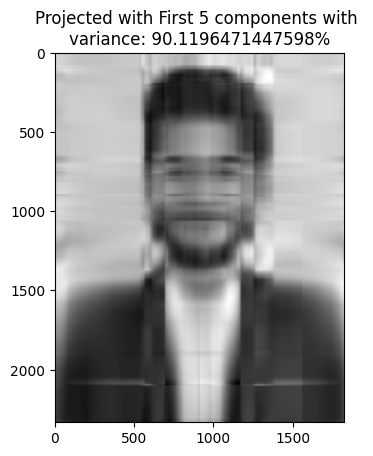

In [96]:
explained_var, reconstructed_from_projected_data = reconstruct_image(5, case = 'First')

<b> We can clearly see that by using top 5 principal components, we can retain approximately 90 % of the variance in our original data.

## Image reconstruction using top 50 principal components

Performing PCA with  First   50  Principal Components.
Projected data shape:  (2333, 50)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 50 principal components is: 99.13832627477287


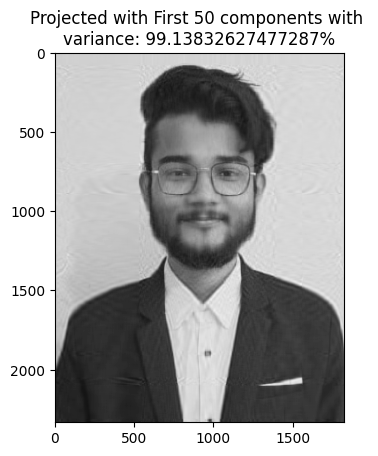

In [97]:
explained_var, reconstructed_from_projected_data = reconstruct_image(50, case = 'First')

<B> Using top 50 principal components, we can retain about almost 99.15 % of the total explained variance in the original data.

## Image reconstruction using last 1774 principal components

In [98]:
sum(exp_var[50:])

0.8616737252270904

Performing PCA with  Last   1774  Principal Components.
Projected data shape:  (2333, 50)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 1774 principal components is: 0.8616737252270904


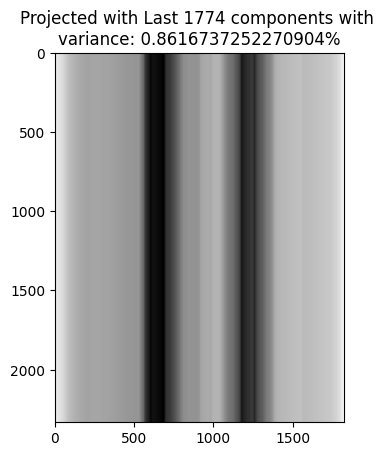

In [99]:
explained_var, reconstructed_from_projected_data = reconstruct_image(1774, case = 'Last')

<b> When we use the last 1774 principal components, we only retain very small amount of information from out original image. Thus, we need not to use majority of principal components. Out of 1824 components, the first 50 can retain more thab 99 % of the variance. 
Therefore, we can retain much of our original image's information by using only first 50 principal components respectively. 

## Final plot with top 50 principal components

Performing PCA with  First   50  Principal Components.
Projected data shape:  (2333, 50)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 50 principal components is: 99.13832627477287


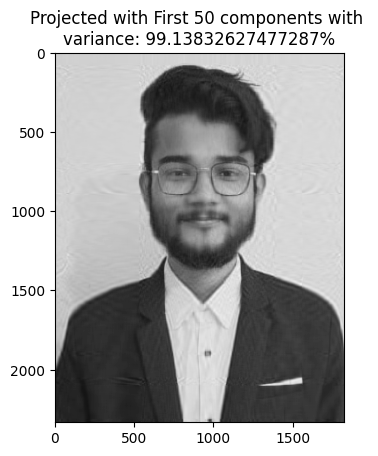

In [100]:
explained_var, reconstructed_from_projected_data = reconstruct_image(50, case = 'First')

In [101]:
Image.from_(reconstructed_from_projected_data)

array([[213.03863419, 212.92968024, 212.73726858, ..., 220.14301105,
        219.53225539, 218.7673794 ],
       [212.94617401, 212.84038032, 212.64530172, ..., 220.25801173,
        219.5749381 , 218.7547129 ],
       [212.91062513, 212.81752765, 212.62921518, ..., 220.32421047,
        219.58673597, 218.69361145],
       ...,
       [ 43.03481146,  43.34301312,  42.28916404, ...,  62.62284483,
         61.71317686,  62.10647382],
       [ 43.09582566,  43.45130785,  42.51129061, ...,  62.86589914,
         62.56046   ,  62.92362972],
       [ 44.62411562,  44.95679319,  43.98486262, ...,  63.12856273,
         63.40841451,  63.9291361 ]])

In [ ]:
img.save('grayscale_sujan.jpg')

<b> Total Explained Variance with 50 principal components is: 99.13832627477287


# 6. Experiment with different number of components

## First principal component only

Performing PCA with  First   1  Principal Components.
Projected data shape:  (2333, 1)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 1 principal components is: 65.08161492669974


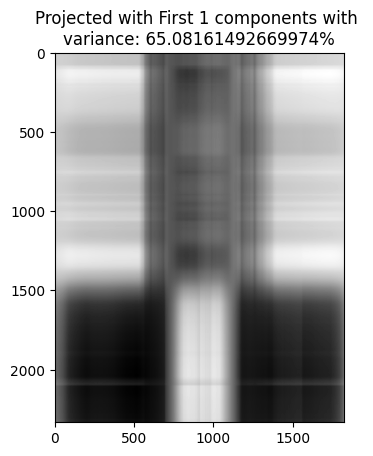

In [290]:
explained_var, reconstructed_from_projected_data = reconstruct_image(1, case = 'First')

<b> The first principal component has retained 65.08 % of the total variance.

## First 10 principal components

Performing PCA with  First   10  Principal Components.
Projected data shape:  (2333, 10)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 10 principal components is: 94.8174798940834


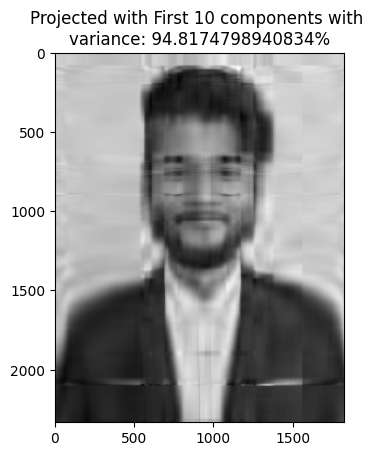

In [291]:
explained_var, reconstructed_from_projected_data = reconstruct_image(10, case = 'First')

<b> The first principal 10 components have retained 94.81 % of the total variance.

## First 20 principal components

Performing PCA with  First   20  Principal Components.
Projected data shape:  (2333, 20)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 20 principal components is: 97.50570347512644


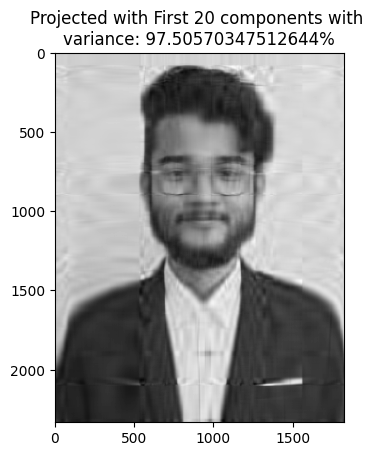

In [292]:
explained_var, reconstructed_from_projected_data = reconstruct_image(20, case = 'First')

<b> The first principal 20 components have retained 97.5 % of the total variance.

## Last 100 principal components

Performing PCA with  Last   100  Principal Components.
Projected data shape:  (2333, 1724)
Reconstructed from the projected data shape:  (2333, 1824)
Total Explained Variance with 100 principal components is: 6.091564402628111e-06


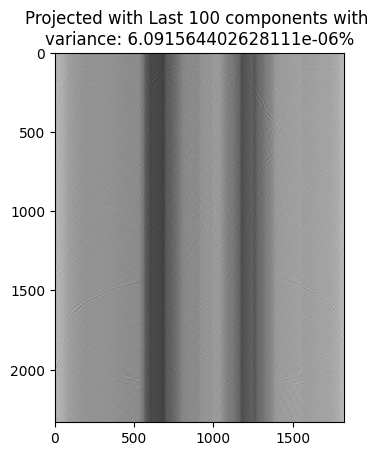

In [293]:
explained_var, reconstructed_from_projected_data = reconstruct_image(100, case = 'Last')

<b> The last 100 principal components have retained very very small percentage of the total variance.

# 7. Conclusion

The PCA algorithm has successfully reduced the number of principal components that we needed to use in our data for retreiving majority of information with less number of dimensions. Out of 1824 components, we could simply use the first 50 principal components and retain more than 99 % of the total variance, which is exactly the main motivation for using PCA for image compression: <b> To reduce the dimensionality of image with minimal loss of information and retaining maximum information as much as possible. 

# Done by Sujan Neupane
# Group 2
# UNI ID: 2058939